#Iris Flower Classification

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
iris = pd.read_csv("/content/Iris.csv")
iris.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.shape
iris.isnull().sum()


,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [ ]:
iris.drop('Id', axis=1, inplace=True)


**define features and target**

In [ ]:
X = iris.drop('Species', axis=1)   # features
y = iris['Species']               # target


**Encode Target**

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)


**Train-test split**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


**Train The model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)


**Model Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

acc = accuracy_score(y_test, y_pred)
f1  = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", acc)
print("F1 Score:", f1)


Accuracy: 1.0
F1 Score: 1.0


**Overfitting Check**

In [ ]:
print("Training Accuracy:", dt.score(X_train, y_train))
print("Testing Accuracy :", dt.score(X_test, y_test))


Training Accuracy: 1.0
Testing Accuracy : 1.0


**Reduce Overfitting(Depth Tuning)**


In [ ]:
from sklearn.model_selection import cross_val_score

for depth in [1,2,3,4,5,6,7,8,9,10,20]:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)

    train_acc = accuracy_score(y_train, dt.predict(X_train))
    cv_score  = cross_val_score(dt, X_train, y_train, cv=10).mean()

    print(f"Depth: {depth} | Train Acc: {train_acc:.3f} | CV Acc: {cv_score:.3f}")


Depth: 1 | Train Acc: 0.675 | CV Acc: 0.675
Depth: 2 | Train Acc: 0.950 | CV Acc: 0.900
Depth: 3 | Train Acc: 0.958 | CV Acc: 0.933
Depth: 4 | Train Acc: 0.975 | CV Acc: 0.917
Depth: 5 | Train Acc: 0.992 | CV Acc: 0.917
Depth: 6 | Train Acc: 1.000 | CV Acc: 0.925
Depth: 7 | Train Acc: 1.000 | CV Acc: 0.925
Depth: 8 | Train Acc: 1.000 | CV Acc: 0.925
Depth: 9 | Train Acc: 1.000 | CV Acc: 0.925
Depth: 10 | Train Acc: 1.000 | CV Acc: 0.925
Depth: 20 | Train Acc: 1.000 | CV Acc: 0.925


**Feature Importance**

In [ ]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)

importance = dt.feature_importances_

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

feature_importance


,Feature,Importance
2,PetalLengthCm,0.934626
3,PetalWidthCm,0.065374
1,SepalWidthCm,0.000000
0,SepalLengthCm,0.000000


**Optimal Visualization**

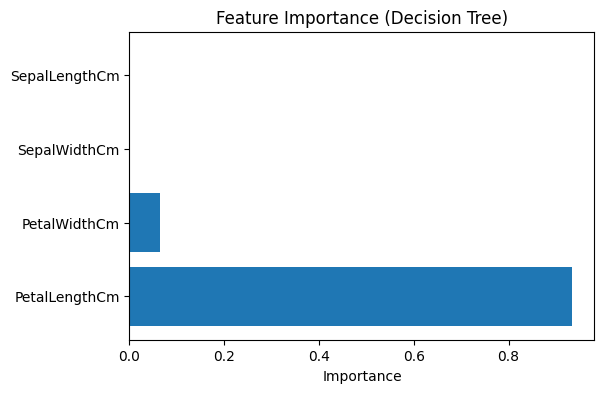

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel("Importance")
plt.title("Feature Importance (Decision Tree)")
plt.show()
